# spotify songs popularity prediction models

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../dataset/spotify.csv")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.shape

(114000, 21)

In [4]:
data.columns.to_list()

['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [5]:
data = data.drop(columns=["Unnamed: 0", "track_id"])
data.sample(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
35988,Calango Aceso,"Somzoom Apresenta: Só Forró ao Vivo, Vol. 2",Fom Fonrom Fonfom,36,202413,False,0.674,0.886,10,-5.717,0,0.0403,0.126000,0.001260,0.3140,0.925,191.700,4,forro
22887,Amorphis,Silent Waters,A Servant,21,235026,False,0.120,0.906,0,-4.106,0,0.0793,0.000004,0.865000,0.1690,0.134,148.948,4,death-metal
69101,Thaikkudam Bridge,Navarasam,One,41,269625,False,0.613,0.813,8,-5.394,1,0.0546,0.188000,0.000000,0.0856,0.648,112.458,3,malay
5070,KANKAKU PIERO,Iroirotoiro,Harukamirai,63,177106,False,0.459,0.990,9,-1.083,1,0.1280,0.010200,0.000005,0.3070,0.458,91.006,4,anime
95291,Adolescent's Orquesta,Ahora Más Que Nunca,Ancianos,33,201874,False,0.712,0.594,0,-5.357,1,0.0335,0.466000,0.000000,0.0836,0.808,139.868,4,salsa
87281,Julio Preciado Y Su Banda Perla Del Pacifico,16 Bandazos de Oro,El Disgusto,48,187946,False,0.776,0.504,8,-7.193,1,0.0385,0.727000,0.000474,0.1670,0.963,115.803,4,r-n-b
21865,Mr Eazi;emPawa Africa;King Promise,One Day You Will Understand,Baby I'm Jealous,51,150000,False,0.667,0.442,1,-7.069,0,0.2910,0.148000,0.000000,0.1020,0.526,107.092,4,dancehall
48892,Cueio Limão,Paraguayo,Quando Tocar na Tv,29,157266,False,0.509,0.936,11,-3.832,1,0.0651,0.022500,0.000000,0.1590,0.706,190.031,4,hardcore
93278,Igor Talkov,I Will Return,Summer Rain,5,519131,False,0.648,0.436,2,-11.607,0,0.0272,0.758000,0.002260,0.3320,0.490,109.631,4,romance
91998,Tom Petty and the Heartbreakers,All I Want For Christmas Is You,Christmas All Over Again,0,253626,False,0.440,0.838,9,-6.196,1,0.0423,0.095600,0.000000,0.4730,0.619,138.908,4,rock


In [6]:
data.shape

(114000, 19)

In [7]:
features = data.columns.to_list()
features

['artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [8]:
# checking for missing values
data.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
# dropping the one row missing data
data = data.dropna()

In [10]:
data.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
data.shape

(113999, 19)

In [12]:
data.sample(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
66808,Cody;Heart;Mr. Primm;Scatter;K.Flay,"Helpsters, Vol. 2 (Apple TV+ Original Series S...",I Like Pencils,9,96000,False,0.962,0.453,7,-9.519,1,0.2490,0.49400,0.000000,0.1000,0.992,104.956,4,kids
70791,Gigi Leung,順時針 (新歌+精選),膽小鬼,52,258106,False,0.676,0.446,7,-8.327,1,0.0285,0.65700,0.000000,0.1120,0.427,115.017,4,mandopop
65749,SEVENTEEN,SEVENTEEN 4th Album Repackage 'SECTOR 17',Circles,67,239613,False,0.650,0.456,1,-5.742,1,0.0299,0.65900,0.000000,0.1220,0.475,82.063,4,k-pop
83974,Armin van Buuren;Vini Vici;Tribal Dance;Natali...,Yama,Yama,49,196521,False,0.609,0.954,5,-5.506,1,0.1710,0.01220,0.050000,0.1380,0.117,138.051,4,progressive-house
2426,I DONT KNOW HOW BUT THEY FOUND ME,Halloween & Alternative,Choke,0,195717,False,0.516,0.850,4,-3.910,0,0.0706,0.00139,0.000000,0.2950,0.583,120.326,4,alt-rock
44525,Linkin Park,Hybrid Theory,Points of Authority,46,200240,False,0.512,0.970,8,-3.886,0,0.2120,0.03000,0.000000,0.0994,0.427,94.952,4,grunge
71217,Red Hot Chili Peppers,Blood Sugar Sex Magik (Deluxe Edition),Under the Bridge,82,264306,False,0.559,0.345,4,-13.496,1,0.0459,0.05760,0.000105,0.1410,0.458,84.581,4,metal
92573,Si Cranstoun,Old School,Vegas Baby,26,198946,False,0.714,0.784,2,-5.201,1,0.0946,0.50100,0.000000,0.2500,0.965,157.009,4,rockabilly
12030,my little airport,跟你開玩笑,我不適合聚會,44,127078,False,0.549,0.399,9,-11.795,0,0.0281,0.39900,0.043000,0.1010,0.300,119.082,4,cantopop
83047,Swedish House Mafia;John Martin,Larga Vida al Electro,Don't You Worry Child - Radio Edit,0,211360,False,0.609,0.830,11,-3.229,0,0.0552,0.11700,0.000000,0.1800,0.478,128.986,4,progressive-house


In [13]:
# checking for duplicates
data.duplicated().sum()

np.int64(577)

In [14]:
# checking duplicates by song name and artist
dupes = data[data.duplicated(subset=['track_name', 'artists'], keep=False)]
print(dupes[['track_name', 'artists']].head(20))


                          track_name                               artists
0                             Comedy                           Gen Hoshino
1                   Ghost - Acoustic                          Ben Woodward
3         Can't Help Falling In Love                          Kina Grannis
4                            Hold On                      Chord Overstreet
5               Days I Will Remember                          Tyrone Wells
6                      Say Something  A Great Big World;Christina Aguilera
7                          I'm Yours                            Jason Mraz
8                              Lucky             Jason Mraz;Colbie Caillat
9                             Hunger                        Ross Copperman
10              Give Me Your Forever                          Zack Tabudlo
11                   I Won't Give Up                            Jason Mraz
12                              Solo                              Dan Berk
13                       

In [15]:
# dropping the duplicates
data = data.drop_duplicates(subset=['track_name', 'artists']).reset_index(drop=True)
data.duplicated().sum()

np.int64(0)

In [16]:
data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [17]:
data.shape

(81343, 19)

In [18]:
data["popularity"].dtype

dtype('int64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           81343 non-null  object 
 1   album_name        81343 non-null  object 
 2   track_name        81343 non-null  object 
 3   popularity        81343 non-null  int64  
 4   duration_ms       81343 non-null  int64  
 5   explicit          81343 non-null  bool   
 6   danceability      81343 non-null  float64
 7   energy            81343 non-null  float64
 8   key               81343 non-null  int64  
 9   loudness          81343 non-null  float64
 10  mode              81343 non-null  int64  
 11  speechiness       81343 non-null  float64
 12  acousticness      81343 non-null  float64
 13  instrumentalness  81343 non-null  float64
 14  liveness          81343 non-null  float64
 15  valence           81343 non-null  float64
 16  tempo             81343 non-null  float6

In [20]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,2.314145e+05,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
std,19.438517,1.164924e+05,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,35.000000,2.152050e+05,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,49.000000,2.673460e+05,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## exploratory data analysis

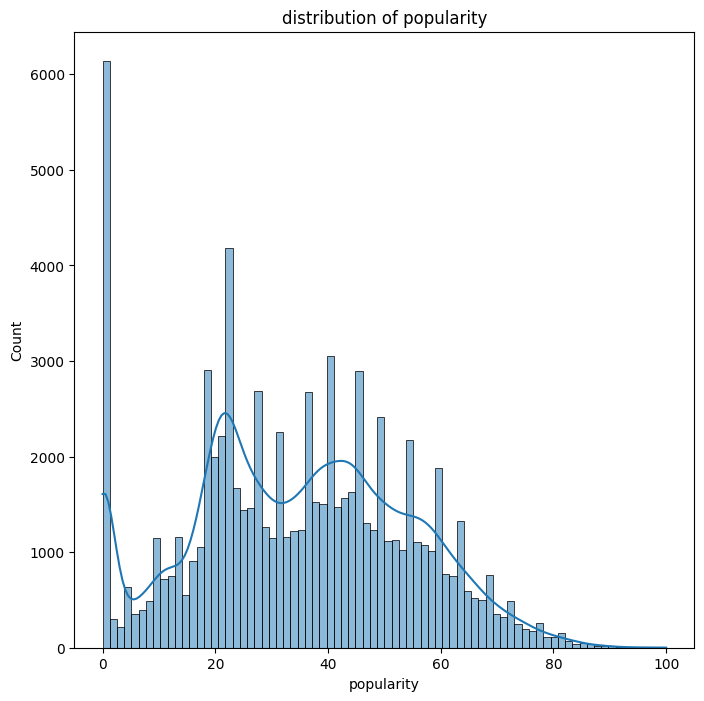

In [21]:
# distribution of popularity
plt.figure(figsize=(8, 8))
sns.histplot(data["popularity"], kde=True)
plt.title("distribution of popularity")
plt.show()

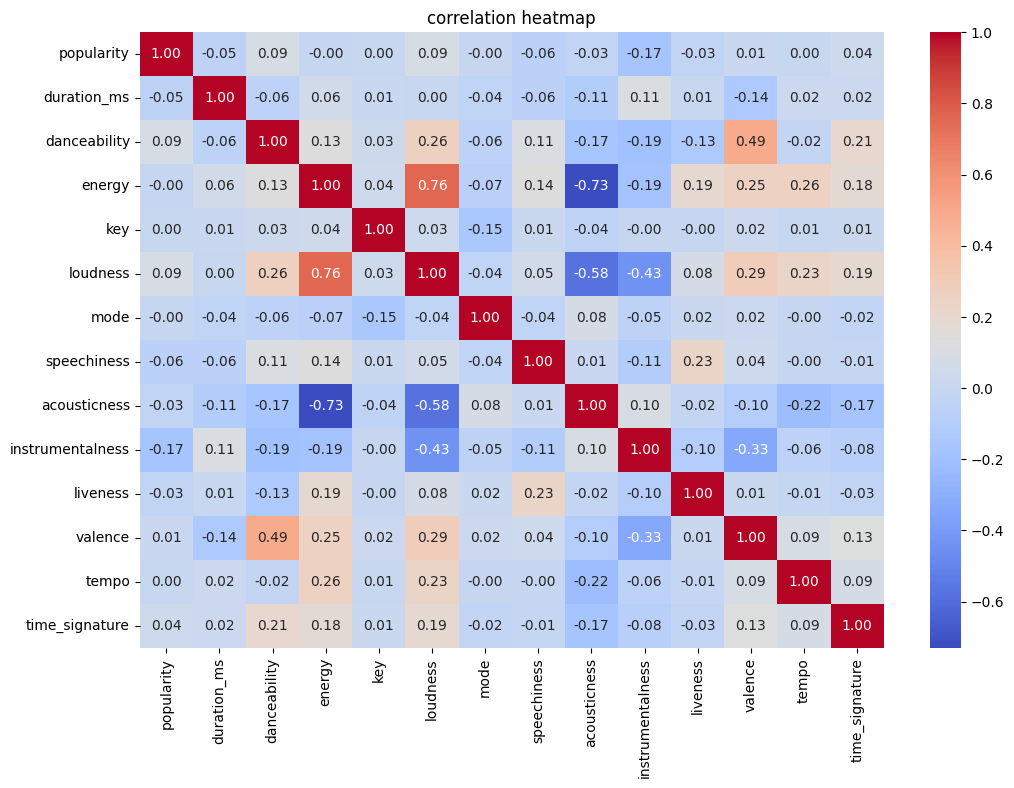

In [22]:
# correlation heatmap
corr = data.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("correlation heatmap")
plt.show()

## feature engineering

In [23]:
data.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [24]:
data["popularity"].value_counts()

popularity
0      5451
21     2212
22     2193
20     1996
23     1993
       ... 
98        2
94        2
95        2
100       1
99        1
Name: count, Length: 101, dtype: int64

In [25]:
data["popularity"].head(10)

0    73
1    55
2    57
3    71
4    82
5    58
6    74
7    80
8    74
9    56
Name: popularity, dtype: int64

In [26]:
# important features
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']
X.shape


(81343, 11)

In [27]:
y.sample(10)

38561    67
77928    31
46894    22
67349     0
71680    41
3567     49
67062     0
4198     56
17932    57
80285    38
Name: popularity, dtype: int64

In [28]:
X.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
48262,0.478,0.7960,1,-7.481,1,0.0303,0.003390,0.000000,0.226,0.597,157.085
72262,0.677,0.6370,6,-8.296,1,0.0593,0.020200,0.000034,0.105,0.560,174.060
53101,0.785,0.8730,2,-4.742,1,0.1320,0.031500,0.000000,0.361,0.548,98.003
56311,0.332,0.7690,9,-4.984,1,0.0416,0.158000,0.000001,0.704,0.350,175.938
52989,0.510,0.7480,4,-7.670,0,0.3280,0.033100,0.000000,0.206,0.657,170.072
49477,0.361,0.1160,3,-18.774,0,0.0432,0.924000,0.000004,0.739,0.387,84.414
68076,0.731,0.5030,1,-11.569,1,0.0409,0.738000,0.000042,0.104,0.955,87.141
9194,0.746,0.9630,1,-6.487,1,0.1010,0.000229,0.834000,0.329,0.243,129.000
22596,0.734,0.0312,10,-14.944,1,0.2070,0.994000,0.923000,0.126,0.306,60.404
8485,0.545,0.9520,0,-4.413,1,0.0490,0.000255,0.043200,0.151,0.099,133.036


##  building and training the model

In [29]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=21
)
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(81343, 11) (65074, 11) (16269, 11) (65074,) (16269,)


In [30]:
# initializing the model
model = RandomForestRegressor(
    n_estimators=100,
    random_state=21
)

In [31]:
# training the model
model.fit(
    X_train,
    y_train
)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# making predictions
y_pred = model.predict(X_test)

# evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# output
print(f"mean absolute error:\n", mae)
print(f"r2 score:\n", r2)

mean absolute error:
 14.344862919147634
r2 score:
 0.11341131137199023


In [33]:
# assesing models perfomance

## assesing the models perfomance

In [34]:
# feature importance
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame(
    {
        "Feature": features,
        "Importance": feature_importances
    }
)
importance_df = importance_df.sort_values(
    by="Importance",
    ascending=False
)

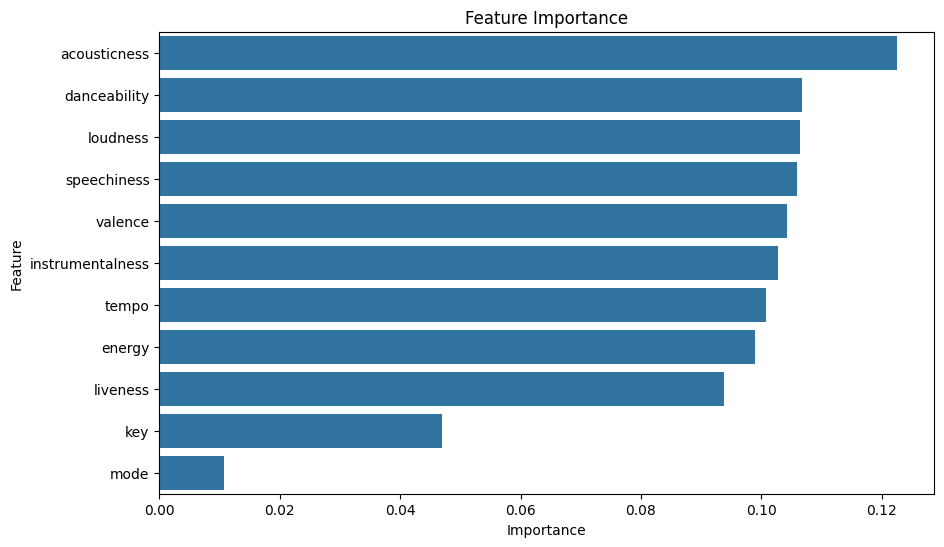

In [35]:
# plotting he feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df
)
plt.title("Feature Importance")
plt.show()

## xgboost Model

In [36]:
data.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [37]:
data.shape

(81343, 19)

In [38]:
data["explicit"].value_counts()

explicit
False    74385
True      6958
Name: count, dtype: int64

In [39]:
xg_data = data.copy()
xg_data.shape

(81343, 19)

In [40]:
xg_data = xg_data.drop(columns=[
    "explicit",
    "artists",
    "album_name",
    "track_name",
    "track_genre"
])
xg_data.shape

(81343, 14)

In [42]:
xg_data.head(10)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
5,58,214240,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4
6,74,229400,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3
7,80,242946,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4
8,74,189613,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4
9,56,205594,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4


In [43]:
xg_data["time_signature"].value_counts()

time_signature
4    71986
3     6944
5     1488
1      775
0      150
Name: count, dtype: int64

In [44]:
xg_data["mode"].value_counts()

mode
1    51437
0    29906
Name: count, dtype: int64